In [26]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

In [27]:
#Liquid properties
rho = 1e3
mu = 8.9e-4
sigma=0.072

#Ambient COnditions
p_atm = 1e5
p_v = 2330

#Polytropic coeff
gamma=1.33

In [91]:
#initial Condition
R_0 = 2e-6
u_0 = 0

In [169]:
#partial pressure of air at eqb
p_g0 = p_atm + 2 * sigma/R_0 - p_v

In [170]:
#pressure at infty as a function of time
p_a = 1.2*p_atm
omega = 2*np.pi*25600
def p_infty (t):
    p_it = p_atm - p_a * np.sin(omega*t)
    return p_it
#partial pressure of air as a function of R
def p_gas(R):
    p_g = p_g0*np.power(R_0/R, 3*gamma);
    return p_g

In [171]:
#d/dt (x) = equation(x,t)
def equation(x, t):
    (R,u) = x;
    udot = (p_gas(R)+p_v-p_infty(t)-2*sigma/R-4*mu*u/R)/(R*rho)-3*u**2/(2*R)
    return (u, udot)

In [172]:
#solving ODE
#time = np.arange(0, 0.0003, 0.00000000025)
time = np.arange(0, 70e-6, 0.00000000025)
R_1 = odeint(equation, [R_0, u_0], time)

In [173]:
#plot
V = R_1[:,1]
R = R_1[:,0]/R_0
mtimes = time/(2*np.pi/omega)

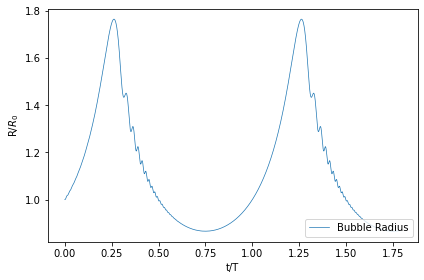

In [174]:
#plot results

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("R/$R_0$")
ax1.plot(mtimes, R, linewidth = 0.7, label = "Bubble Radius")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()